#OPCION 1

La base con la que trabajaremos en este ejercicio práctico contiene información bancaria de clientes y de campañas de marketing de un banco de Portugal.
Las campañas realizadas se basaron en su mayoría en llamadas telefónicas directas, ofreciendo al cliente del banco realizar un depósito a plazo. Si después de todos los esfuerzos de marketing, el cliente ha accedido a realizar el depósito: la variable de destino fue marcada como 'sí'; de lo contrario, 'no'

- edad
- tipo de trabajo
- esatdo civil
- educación
- si el cliente entró en no pago o tiene un crédito en default
- vivienda propia
- si el cliente posee un préstamo , entre otras


Es una base que tiene un puntaje de 10/10 en usabilidad, lo que nos indica que es adecuada para el uso de estudiantes y principiantes dado que no tiene grandes problemas en sus datos.

# Instrucciones:

### 1. Importe la base de datos y ejecute el script en  una base al Jupyter Notebook con pandas.

LLamamos las bibliotecas para realizar el análisis de datos.

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula y al módulo para las pruebas de hipótesis.(Estimación estadística)

In [ ]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

Ahora, llamamos a la base de datos "bank-additional-full.csv"

In [ ]:
#Se da permiso a Google Drive para tener acceso a la base de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importamos la base de datos, subida en google drive, según la ruta, con el nombre df
filename='/content/bank-additional-full.csv'
#Lee el archivo CSV
df=pd.read_csv(filename, sep=';' )
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Como se observa en la tabla se inicia el análisis con 41188 filas (Observaciones) y 21 columnas ( atributos que definen si un cliente acepta o no un depósito a plazo)

**Variables de la base de datos **

        1: "Age: Edad del cliente."
        2: "Job: Tipo de trabajo del cliente."
        3: "Marital: Estado civil del cliente."
        4: "Education: Educación del cliente."
        5: "Default: El cliente ha estado en mora o incumplido sus obligaciones."
        6: "Housing: El cliente tiene un préstamo de vivienda."
        7: "Loan: El cliente tiene un préstamo personal."
        8: "Contact: Tipo de comunicación del contacto."
        9: "Month: Último mes del año de contacto."
        10: "day_of_week: último día de contacto de la semana.",
        11: "duration: Duración del último contacto en segundos."
        12: "Pdays: Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente).",
        13: "Previous: **Número de contactos realizados antes de esa campaña**."
        14: "Poutcome: Resultado de la campaña de marketing anterior."
        15: "Emp.var.rate: Tasa de variación del empleo - indicador trimestral."
        16: "Cons.price.idx: Índice de precios al consumidor - indicador mensual."
        17: "Cons.conf.idx: Índice de confianza del consumidor - indicador mensual."
        18: "Euribor3m: Tipo de cambio euribor a 3 meses - indicador diario."
        19: "Nr.employed: Número de empleados - indicador trimestral."
        20: y: depósito a plazo

### 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que les llame la atención?

En la siguiente linea se identifica que variables están consideradas como variables numéricas y cuales como categóricas

In [ ]:
#identifica variables numericas y categoricas

numeric_vars = df.select_dtypes(include=['number']).columns
categorical_vars = df.select_dtypes(include=['object']).columns

print("Variables numéricas:", numeric_vars)
print("Variables categóricas:", categorical_vars)

Variables numéricas: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Variables categóricas: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [ ]:
#Estadísticade la base de datos
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#Estadística descriptiva para variables categóricas
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
#Resumen de variables categóricas
categoricas = [col for col in df.columns if df[col].dtype == 'object']

for var in categoricas:
    categorias_unicas = df[var].unique()
    valores_categorias = df[var].value_counts()
    categorias_dict = {cat: valores_categorias[cat] for cat in categorias_unicas}
    print(f'{var}: {categorias_dict}')

job: {'housemaid': 1060, 'services': 3969, 'admin.': 10422, 'blue-collar': 9254, 'technician': 6743, 'retired': 1720, 'management': 2924, 'unemployed': 1014, 'self-employed': 1421, 'unknown': 330, 'entrepreneur': 1456, 'student': 875}
marital: {'married': 24928, 'single': 11568, 'divorced': 4612, 'unknown': 80}
education: {'basic.4y': 4176, 'high.school': 9515, 'basic.6y': 2292, 'basic.9y': 6045, 'professional.course': 5243, 'unknown': 1731, 'university.degree': 12168, 'illiterate': 18}
default: {'no': 32588, 'unknown': 8597, 'yes': 3}
housing: {'no': 18622, 'yes': 21576, 'unknown': 990}
loan: {'no': 33950, 'yes': 6248, 'unknown': 990}
contact: {'telephone': 15044, 'cellular': 26144}
month: {'may': 13769, 'jun': 5318, 'jul': 7174, 'aug': 6178, 'oct': 718, 'nov': 4101, 'dec': 182, 'mar': 546, 'apr': 2632, 'sep': 570}
day_of_week: {'mon': 8514, 'tue': 8090, 'wed': 8134, 'thu': 8623, 'fri': 7827}
poutcome: {'nonexistent': 35563, 'failure': 4252, 'success': 1373}
y: {'no': 36548, 'yes': 46

**Observaciones**

*  Dentro de las variables numericas se encuentra pdays contiene un valor de 999 lo cuál es de los clientes que no fueron contactados, por lo que se dará una etiqueta binaria.
*   Se observa que los datos de Age (edad) se centralizan entre mínimo 17 hasta 47 con un 75% de personas.
*   Se tiene el dato "unknown", en las variables categóricas, se pueden tratar como una posible etiqueta de clase o mediante el uso de técnicas de eliminación/imputación.
*   La variable Previous (Contactos anteriores), su mayoría de valores se concentra en 0, por lo que se binariza la variable.
*   De los clientes 36548 no han realizado realizado un depósito a plazo, y 4640 si lo realizan.



In [ ]:
#Número de contactos realizados antes de esa campaña, se observa que se centraliza en el 0 con el 86%
pd.DataFrame(df.previous.value_counts(normalize=True).round(2))

,proportion
previous,
0,0.86
1,0.11
2,0.02
3,0.01
4,0.00
5,0.00
6,0.00
7,0.00


In [ ]:
#Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior
#numérico; 999 significa que el cliente no fue contactado previamente)
#Se observa que los dantos se concentran en el 999 con el 96%
pd.DataFrame(df.pdays.value_counts(normalize=True).round(2))

,proportion
pdays,
999,0.96
3,0.01
6,0.01
4,0.00
9,0.00
2,0.00
7,0.00
12,0.00
10,0.00


In [ ]:
# Duración del último contacto en segundos
pd.DataFrame(df.duration.value_counts(normalize=True).round(2))

,proportion
duration,
90,0.0
85,0.0
136,0.0
73,0.0
124,0.0
...,...
1569,0.0
1053,0.0
1263,0.0


In [ ]:
 #Binarizamos pdays ya contiene un valor de 999 (#de días que pasaron después de que el cliente fue contactado por última )
df.pdays  = np.where(df.pdays == 999,'yes','no')

In [ ]:
import numpy as np

# Binarizamos número de contactos realizados antes de esa campaña previous
df.previous = np.where(df.previous <= 1, df.previous, 2)

In [ ]:
#Imprimimos información de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  object 
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#Verificamos la binarización realizada en pdays(#de días que pasaron después de que el cliente fue contactado por última vez)
df.pdays

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
41183    yes
41184    yes
41185    yes
41186    yes
41187    yes
Name: pdays, Length: 41188, dtype: object

In [ ]:
#Verificación binarizacion - número de contactos realizados antes de esa campaña previous
df.previous

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    1
Name: previous, Length: 41188, dtype: int64

### 3. Evalúe si la base contiene datos perdidos. ¿Son efecivamente datos perdidos?

In [ ]:
#evalua si la base tiene datos perdidos

missing_values = df.isnull().sum()
print(missing_values)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
df_nan = df[df.isna().any(axis=1)]
print(df_nan)

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]


Los códigos expuestos en el punto 3, indican que no se tiene datos nulos, sin embargo pesenta los datos unknown antes expuestos.
A continuación se muestran los valores faltantes:

In [ ]:
import pandas as pd

# Sumar los valores "unknown" de cada una de la variables de la base de datos
unknown_count = (df == "unknown").sum()

# Ordenar los resultados
unknown_count_sorted = unknown_count.sort_values(ascending=False)

# Muestra valores calculados
print(unknown_count_sorted)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64


Después de analizar las variables y sus caracteristicas, se estudiará el modelo y se aplicará decisiones según las necesidades.

**4. Evalúe si alguna de las variables contiene datos atípicos (outliers).**
- De ser el caso detalle cuáles y qué método estadístico aplicarán para corregir

En la gráfica se puede observar que existen varios datos atípicos en algunas de las variables, los cuales serán eliminados.

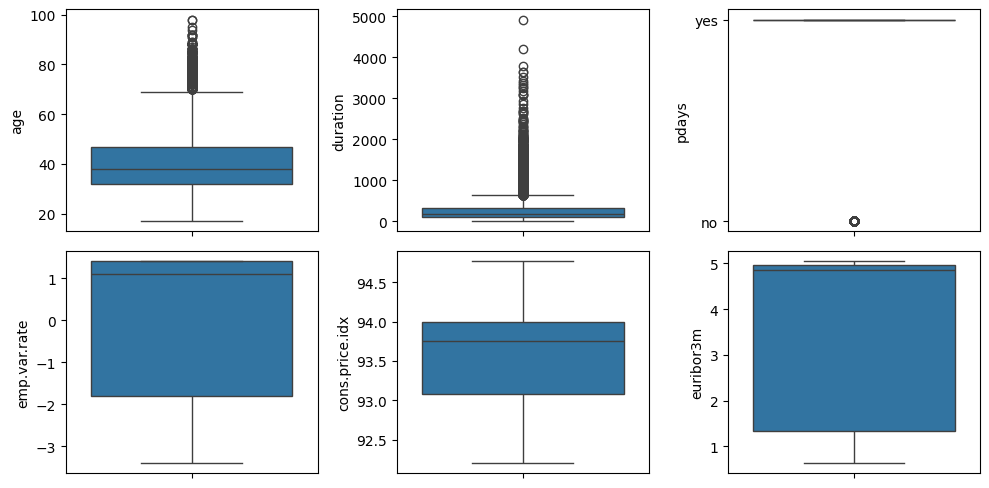

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib
import seaborn as sns
# Box plots
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['age'], ax = axs[0,0])
plt2 = sns.boxplot(df['duration'], ax = axs[0,1])
plt3 = sns.boxplot(df['pdays'], ax = axs[0,2])
plt1 = sns.boxplot(df['emp.var.rate'], ax = axs[1,0])
plt2 = sns.boxplot(df['cons.price.idx'], ax = axs[1,1])
plt3 = sns.boxplot(df['euribor3m'], ax = axs[1,2])
plt.tight_layout()

In [ ]:
df.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.162402,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,0.433241,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 5. Grafique las distribuciones de las variables y a priori comente sobre ellas

Después de eliminar los datos atípicos se obtiene la siguiente distribución en la variables duration.

<Axes: xlabel='duration', ylabel='Density'>

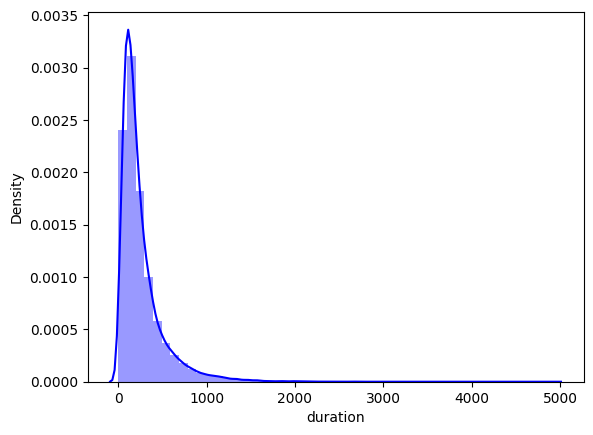

In [ ]:
sns.distplot(df['duration'],color="blue")

Tambien se deben análizar las otras variables para lo que utilizamos los siguientes códigos.

In [ ]:
#Selección de variables cualitativas y cuantitativas
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [ ]:
df.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


Graficos de las variables numericas
Distribucion de "age" La edad promedio de los clientes del banco va de 30 a 40 anios
Distribucion de "duration" El promedio de duracion en segundos de llamadas mantenidas con los clientes fue de 100 a 200

''

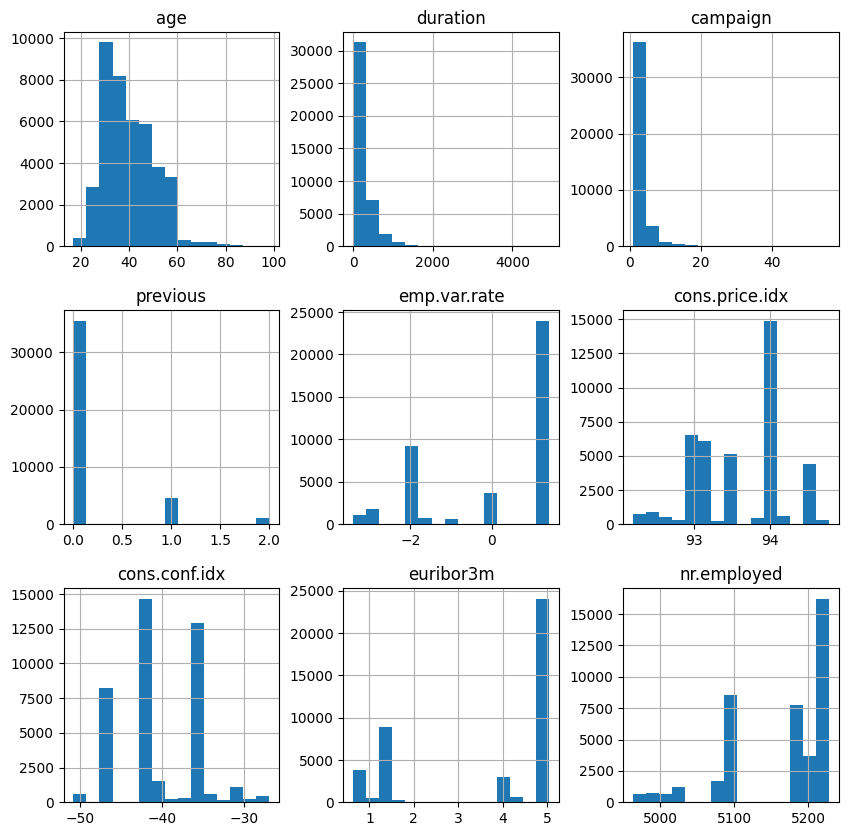

In [ ]:
#Analizamos la concentración de datos en los histográmas de cada una de las variables cuantitatiivas
df[var_cuantitativas].hist(bins = 15, figsize = (10,10))
;

Graficos de las variables categoricas
Distribucion de la variable "job" Se puede evidenciar que los maximos clientes del banco son personas que trabajan en areas administrativas y de mano de obra, hay un numero bajo de estudiantes que son clientes del banco.
Distribucion de "marital" Mas del 50% de los clientes del banco son casados, el resto son solteros o divorciados.
Distribucion de "education" La mayoria de clientes del banco son profesionales de tercer nivel graduados solo aproximadamente el 13% de clientes tienen solamente culminada su eduacion primaria.
Distribucion de "default" Podemos ver que mas del 50% de los clientes no tienen mora en sus creditos lo que podria impulsar sus habitos para ahorrar y realizar el deposito a plazo.
Distribucion de "housing" Se deberia enfocar los esfuerzos en los clientes que tienen casa propia para ofrecer el deposito a plazo y a los que no se los podria considerar para ofrecer otros productos como un prestamo hipotecario lo cual llamaria mas su atencion
Distribucion de "loan" Mas del 80% de los clientes del banco no tienen un prestamo personal.
Distribucion de "month" La mayoria de clientes fueron contactados mediante celular.
Distribucion de "month" La mayoria de clientes fueron contactados en los meses de mayo, julio y agosto, y la menor cantidad en septiembre y diciembre esto asociado que en estos meses las personas gastan mas de lo que ahorran.
Distribucion de "day_of_week" Este valor se mantiene parejo para todos los dias de la semana para que el proyecto pueda tener mejores resultados.
Distribucion de "poutcome" en la anterior campana la mayoria de resultados son desconocidos casi el 70% seguido por fallidos y por ultimo satisfactorios, con el analisis que se realiza se espera que estos datos cambien por mayores datos satisfactorios para la campana.
Distribucion de "y" o de los clientes que decidieron realizar el deposito a plazo en donde mas del 80% no realizaron un deposito.

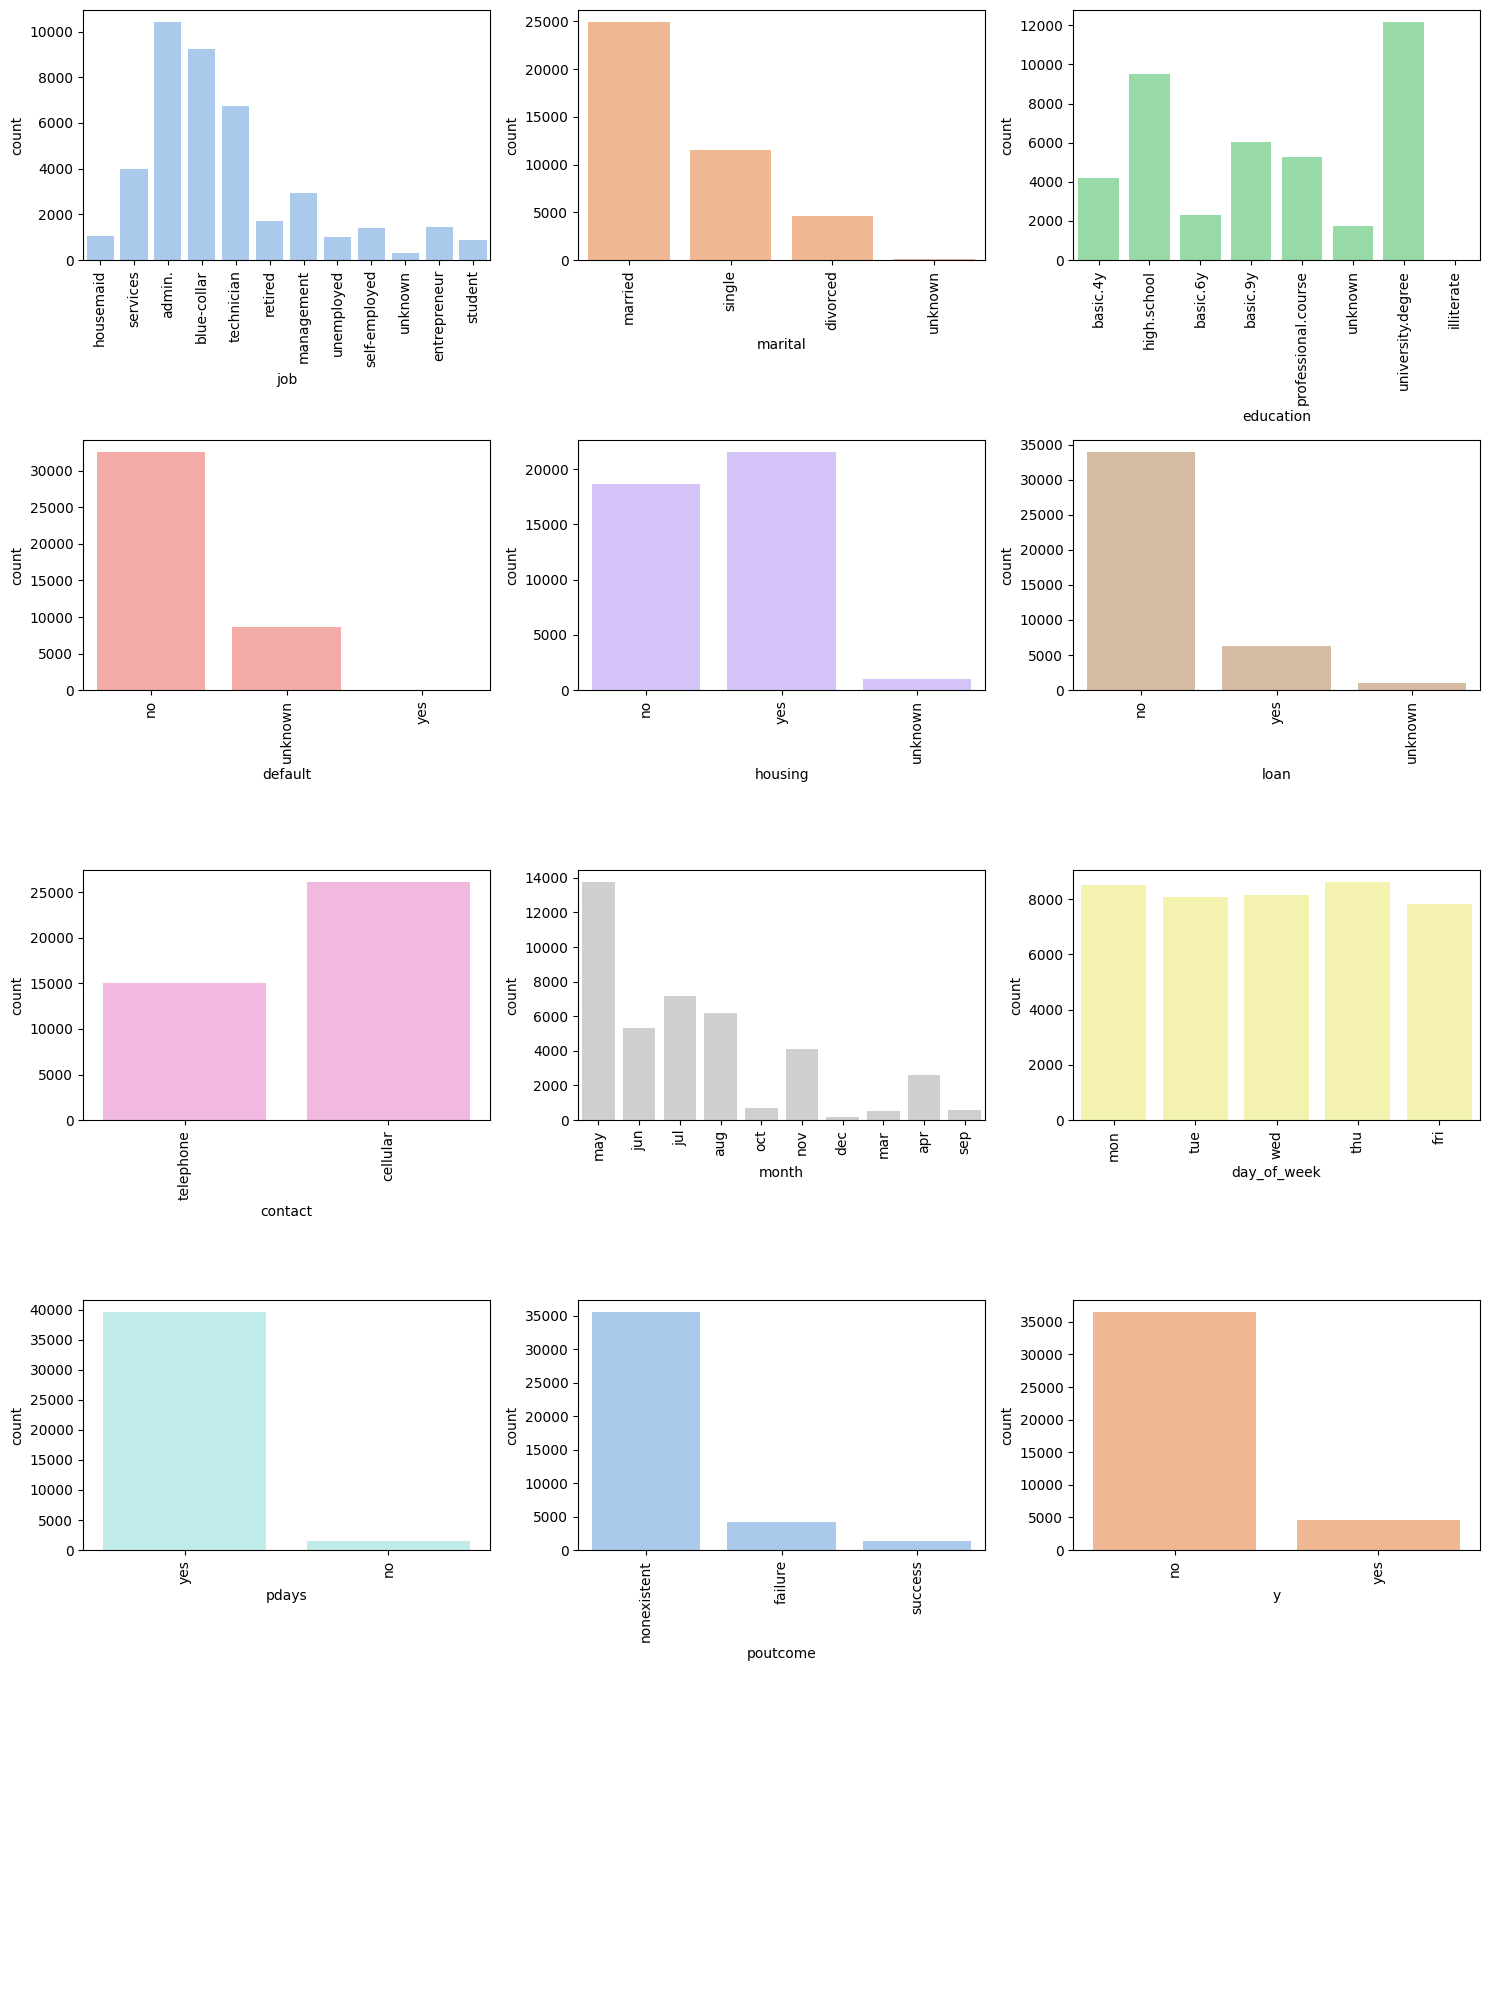

In [ ]:
if len(var_cualitativas) != 12:
    raise ValueError("El número de variables cualitativas no coincide con el número de subgráficos")

# For plotting multiple category columns at once
fig, ax = plt.subplots(5, 3, figsize=(15, 20))  # 5 filas, 3 columnas para 15 gráficos
colors = sns.color_palette('pastel')  # Colores pastel para cada variable

for i, variable in enumerate(var_cualitativas):
    if i < 12:
        sns.countplot(x=df[variable], ax=ax.flatten()[i], color=colors[i % len(colors)])  # Selecciona color de manera cíclica
        ax.flatten()[i].set_xticklabels(ax.flatten()[i].get_xticklabels(), rotation=90)  # Rotación de etiquetas en eje x

# Ocultar los gráficos que no se están utilizando
for j in range(len(var_cualitativas), len(ax.flatten())):
    ax.flatten()[j].axis('off')

plt.tight_layout()  # Ajuste de diseño
plt.show()

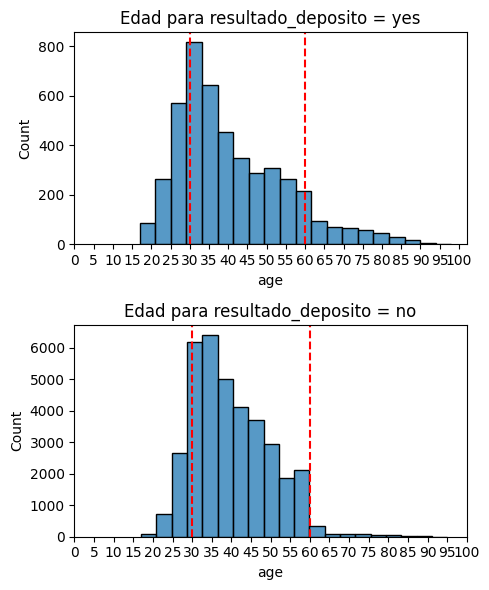

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para las dos categorías de resultado_deposito
df_yes = df[df['y'] == 'yes']
df_no = df[df['y'] == 'no']

# Crear dos gráficos separados
fig, axs = plt.subplots(2, figsize=(5, 6))

# Configurar los histogramas para la variable 'edad' en cada gráfico
sns.histplot(data=df_yes, x='age', bins=20, ax=axs[0])
sns.histplot(data=df_no, x='age', bins=20, ax=axs[1])

# Agregar líneas verticales a cada gráfico
for ax in axs:
    ax.axvline(x=30, color='red', linestyle='--')
    ax.axvline(x=60, color='red', linestyle='--')

# Configurar los ejes x
for ax in axs:
    ax.set_xticks(range(0, 101, 5))

# Configurar las etiquetas y los títulos de los ejes
axs[0].set_title('Edad para resultado_deposito = yes')
axs[1].set_title('Edad para resultado_deposito = no')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Los bancos no están muy interesados en contactar a las personas mayores. Sin embargo, después de los 60 años, la proporción de personas que suscriben un depósito a plazo (y = yes) es mayor. Esto sugiere que las personas mayores tienen más probabilidades de abrir un depósito a plazo.

Hemos dividido la variable de edad en tres rangos: <30, 30-60, y >60, ya que por sí sola no proporciona información relevante. Se recomienda utilizar la variable de edad como categórica para mejorar el rendimiento del modelo.

In [ ]:
import pandas as pd  # Import pandas for quantile calculations

Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['duration'] < (Q1 - 1.5 * IQR)) |(df['duration'] > (Q3 + 1.5 * IQR)))]
df.shape

(38225, 21)

<Axes: xlabel='duration', ylabel='Density'>

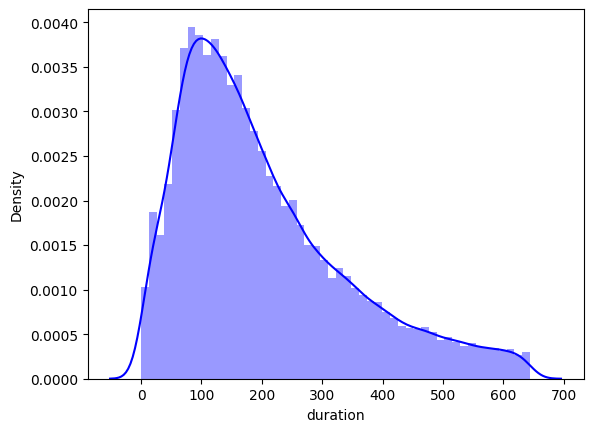

In [ ]:
#Verificamos la distribución después de eliminar outliers
sns.distplot(df['duration'],color="blue")

In [ ]:
#Observamos información después de aplicar los cambios.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38225 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38225 non-null  int64  
 1   job             38225 non-null  object 
 2   marital         38225 non-null  object 
 3   education       38225 non-null  object 
 4   default         38225 non-null  object 
 5   housing         38225 non-null  object 
 6   loan            38225 non-null  object 
 7   contact         38225 non-null  object 
 8   month           38225 non-null  object 
 9   day_of_week     38225 non-null  object 
 10  duration        38225 non-null  int64  
 11  campaign        38225 non-null  int64  
 12  pdays           38225 non-null  object 
 13  previous        38225 non-null  int64  
 14  poutcome        38225 non-null  object 
 15  emp.var.rate    38225 non-null  float64
 16  cons.price.idx  38225 non-null  float64
 17  cons.conf.idx   38225 non-null  floa

### 6. Obtenga las correlaciones entre los datos de corte numérico

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.011850,0.004681,0.022349,0.002944,0.002828,0.128226,0.014172,-0.013836
duration,0.011850,1.000000,-0.126423,0.049332,-0.061111,-0.005536,0.005833,-0.068491,-0.089343
campaign,0.004681,-0.126423,1.000000,-0.084821,0.150059,0.128212,-0.015196,0.134414,0.143817
previous,0.022349,0.049332,-0.084821,1.000000,-0.453315,-0.250718,-0.061953,-0.480398,-0.513184
emp.var.rate,0.002944,-0.061111,0.150059,-0.453315,1.000000,0.776026,0.197097,0.972328,0.907600
cons.price.idx,0.002828,-0.005536,0.128212,-0.250718,0.776026,1.000000,0.057944,0.689897,0.524949
cons.conf.idx,0.128226,0.005833,-0.015196,-0.061953,0.197097,0.057944,1.000000,0.278712,0.102479
euribor3m,0.014172,-0.068491,0.134414,-0.480398,0.972328,0.689897,0.278712,1.000000,0.945343
nr.employed,-0.013836,-0.089343,0.143817,-0.513184,0.907600,0.524949,0.102479,0.945343,1.000000


In [ ]:
numerical_df.corr().style.background_gradient(cmap='coolwarm')

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.011850,0.004681,0.022349,0.002944,0.002828,0.128226,0.014172,-0.013836
duration,0.011850,1.000000,-0.126423,0.049332,-0.061111,-0.005536,0.005833,-0.068491,-0.089343
campaign,0.004681,-0.126423,1.000000,-0.084821,0.150059,0.128212,-0.015196,0.134414,0.143817
previous,0.022349,0.049332,-0.084821,1.000000,-0.453315,-0.250718,-0.061953,-0.480398,-0.513184
emp.var.rate,0.002944,-0.061111,0.150059,-0.453315,1.000000,0.776026,0.197097,0.972328,0.907600
cons.price.idx,0.002828,-0.005536,0.128212,-0.250718,0.776026,1.000000,0.057944,0.689897,0.524949
cons.conf.idx,0.128226,0.005833,-0.015196,-0.061953,0.197097,0.057944,1.000000,0.278712,0.102479
euribor3m,0.014172,-0.068491,0.134414,-0.480398,0.972328,0.689897,0.278712,1.000000,0.945343
nr.employed,-0.013836,-0.089343,0.143817,-0.513184,0.907600,0.524949,0.102479,0.945343,1.000000


Para identificar las correlaciones más relevantes en la matriz proporcionada, debes fijarte en las que tienen valores cercanos a 1 (correlación positiva fuerte) o -1 (correlación negativa fuerte), ya que estas indican una relación significativa entre las variables. A continuación se destacan las correlaciones más notables:

Tasa de variación del empleo y número de empleados: La correlación entre la tasa de variación del empleo y el número de empleados es 0.907. Este alto valor positivo sugiere una fuerte relación entre estos dos factores, indicando que un aumento en la tasa de variación del empleo está estrechamente relacionado con un aumento en el número de empleados.

Tasa de eurotibor a 3 meses y tasa de variación del empleo: La correlación entre la tasa de eurotibor a 3 meses y la tasa de variación del empleo es 0.972. Esta alta correlación positiva refleja una relación muy fuerte, lo que significa que los cambios en la tasa de eurotibor a 3 meses están muy asociados con los cambios en la tasa de variación del empleo.

Número de contactos en la campaña actual y número de contactos anteriores: Aunque la correlación es baja (0.004), es importante notar que está muy cerca de cero. Esto sugiere que no existe una relación significativa entre el número de contactos en la campaña actual y el número de contactos anteriores.

Índice del precio del consumidor y tasa de eurotibor a 3 meses: La correlación entre el índice del precio del consumidor y la tasa de eurotibor a 3 meses es 0.688. Esta correlación positiva moderada indica una relación razonable entre estos dos factores, mostrando que las variaciones en el índice del precio del consumidor están asociadas con cambios en la tasa de eurotibor a 3 meses, aunque la relación no es tan fuerte como en las correlaciones mencionadas anteriormente.

Estas correlaciones son clave porque revelan las relaciones más destacadas entre las variables en el conjunto de datos. Considerarlas es fundamental para analizar cómo las variables están interrelacionadas y para desarrollar modelos predictivos efectivos.








### 7. Comente qué variable escogerán como variable dependiente Y y qué variables introducirán a su modelo de Regresión Logística como variables explicativas. Justifique su respuesta

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [ ]:
df[var_cualitativas]=df[var_cualitativas].apply(LabelEncoder().fit_transform)

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


Varaible dependiente: "Y" = Acceda a hacer un depósito

Haciendo un analisis a priri de las variables se consideran las sigueintes para enteder el comportamiento del cliente, el nivel de afinidad de adquirir un prestamo, las condiciones demograficas y la facilidad de contacto con el mismo
Variable explicativas:

-Default

-Housing

-Loan

-Month

-Poutcome

-Previuous

-Campaign


-Emp.var.rate

-contact

-education

-marital

-day_of_week

-pdays

-previous

-nr.employed

### 8. Grabe el primer modelo de regresión y otórguele el alias de su preferencia. Comente los resultados del modelo, por ejemplo:
- ¿Bajo cuántos datos fue obtenido el modelo?
- ¿Cuál es su grado de ajuste?,
- ¿Hay variables significativas?
- ¿Cuáles son las variables no- significativas? Para esta última pregunta por favor aplique un contraste de hipótesis sobre los estimadores

In [ ]:
import statsmodels.formula.api as sms
regresion = sms.logit("y ~ duration + age + contact + education + marital + default + campaign + housing+ loan + month + previous+ poutcome+ Q('emp.var.rate') + Q('nr.employed')", data=df)

results = regresion.fit()

Optimization terminated successfully.
         Current function value: 0.162901
         Iterations 9


In [ ]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                38225
Model:                          Logit   Df Residuals:                    38210
Method:                           MLE   Df Model:                           14
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                  0.4230
Time:                        00:43:27   Log-Likelihood:                -6226.9
converged:                       True   LL-Null:                       -10792.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            62.6096      2.782     22.503      0.000      57.157      68.063
duration              0.0072      0.000     44.639      0.000       0.007       0.008
age                   0.

- ¿Bajo cuántos datos fue obtenido el modelo?



In [ ]:
num_datos = len(df_imputed)
print(f"El modelo fue obtenido bajo {num_datos} datos.")

El modelo fue obtenido bajo 38225 datos.


- ¿Cuál es su grado de ajuste?,

In [ ]:
print("EL grado de ajuste es:", results.prsquared)


EL grado de ajuste es: 0.42301654254788046


- ¿Hay variables significativas?
- ¿Cuáles son las variables no- significativas? Para esta última pregunta por favor aplique un contraste de hipótesis sobre los estimadores

Revisaremos los p-valores para determinar la significancia de las variables. En general, un p-valor menor a 0.05 indica que la variable es significativa.

In [ ]:
p_valores = modelo_alias.pvalues
print("- P-valores de las variables:")
print(p_valores.apply(lambda x: format(x, '0.5f')))

# Identificar variables significativas
variables_significativas = p_valores[p_valores < 0.05]
variables_no_significativas = p_valores[p_valores >= 0.05]

print("- Variables significativas:")
print(variables_significativas.apply(lambda x: format(x, '0.5f')))

print("- Variables no significativas:")
print(variables_no_significativas.apply(lambda x: format(x, '0.5f')))


- P-valores de las variables:
const           0.00000
duration        0.00000
age             0.00000
contact         0.00000
education       0.00000
marital         0.00000
default         0.00000
campaign        0.03540
housing         0.82574
loan            0.25453
month           0.00000
previous        0.00000
poutcome        0.00000
emp.var.rate    0.45419
nr.employed     0.00000
dtype: object
- Variables significativas:
const          0.00000
duration       0.00000
age            0.00000
contact        0.00000
education      0.00000
marital        0.00000
default        0.00000
campaign       0.03540
month          0.00000
previous       0.00000
poutcome       0.00000
nr.employed    0.00000
dtype: object
- Variables no significativas:
housing         0.82574
loan            0.25453
emp.var.rate    0.45419
dtype: object


Variables significativas: Todas las variables en el modelo tienen p-valores de 0.0, lo que indica que son altamente significativas (p < 0.05). Esto significa que hay suficiente evidencia estadística para concluir que estas variables están asociadas con la variable dependiente

Variables no significativas: Si existen con la columna loan, housing, emp.var.rate son superiores al 0.05 por lo que no explican nuestra variable dependiente

### 9. Verifique los supuestos de la Regresión Logística. Comente cada uno de ellos

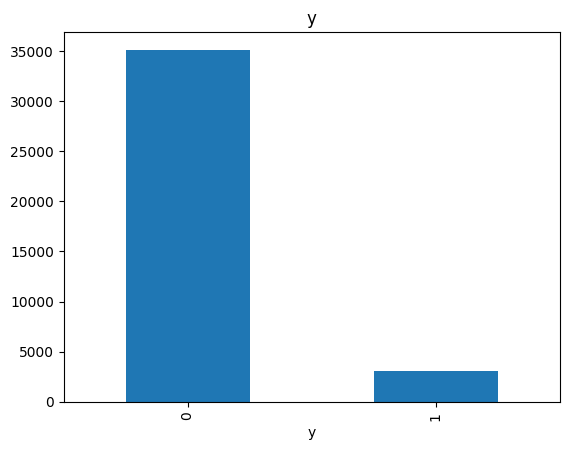

In [ ]:
import matplotlib.pyplot as plt

df.y.value_counts().plot(kind='bar', title="y")
plt.show()

Observamos que se cumple el supuesto de variable dependiente categorica ya que solo tiene dos niveles

### 10. Obtenga el modelo de Regresión Logística definitivo, argumente su respuesta e interprete los coeficientes

In [ ]:
regresion2 = sms.logit("y ~ duration + age + contact + education + marital + default + campaign + month + previous+ poutcome+ Q('emp.var.rate') + Q('nr.employed')", data=df)

results = regresion2.fit()

Optimization terminated successfully.
         Current function value: 0.162919
         Iterations 9


Un vez obtenido los resultados los valores de P de Housing, Load son superiores al 0.05 tolerado, por lo que se proceden a eliminar dichas variables que no nos ayudan a enteder nuestra variable dependiente

Multicolinearidad

In [ ]:
var_predictoras=['duration','age','contact', 'education', 'marital', 'day_of_week', 'pdays', 'campaign','month', 'poutcome', 'Q(\'emp.var.rate\')', 'Q(\'nr.employed\')']

Como ninguna de las variables alcanza un valor P mayo al 0.05. Pordemos concluir que el modelo no tiene problemas de multicolinearidad.

In [ ]:
import statsmodels.api as sm

In [ ]:
# performing predictions on the train datdaset
y_pred = results.predict()

<Axes: xlabel='duration', ylabel='y'>

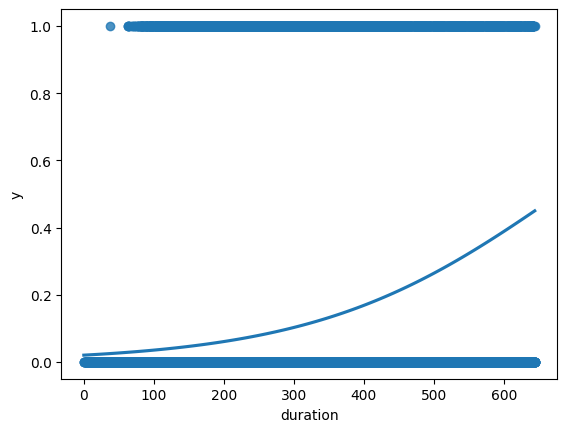

In [ ]:
sns.regplot(x=df['duration'], y=df.y, data=df, logistic=True, ci=None)

Se relaciona la variable Y de la probabilidad de adquirencia de un credito con la duracion de la llamada.
Es decir entre mayor sea la duracion de la llamada mayor sera la posibilidad de que un cliente acceda a un credito

In [ ]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                38225
Model:                          Logit   Df Residuals:                    38212
Method:                           MLE   Df Model:                           12
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                  0.4230
Time:                        00:40:41   Log-Likelihood:                -6227.6
converged:                       True   LL-Null:                       -10792.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            62.6080      2.781     22.510      0.000      57.157      68.059
duration              0.0072      0.000     44.648      0.000       0.007       0.008
age                   0.

In [ ]:
# Calcular los ratios de odds
odds_ratios = pd.DataFrame({
    'Coeficientes': results.params,
    'Ratios de Odds': np.exp(results.params)
})

# Mostrar los ratios de odds
print(odds_ratios)

                   Coeficientes  Ratios de Odds
Intercept             62.608029    1.549964e+27
duration               0.007198    1.007224e+00
age                    0.012606    1.012686e+00
contact               -0.238487    7.878186e-01
education              0.093308    1.097800e+00
marital                0.170415    1.185797e+00
default               -0.695837    4.986568e-01
campaign              -0.055809    9.457195e-01
month                 -0.090347    9.136145e-01
previous               0.337846    1.401925e+00
poutcome               0.999054    2.715711e+00
Q('emp.var.rate')     -0.300366    7.405473e-01
Q('nr.employed')      -0.013410    9.866790e-01


### 11. Grafique a los valores predicho del modelo vs los valores reales
- ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respusta.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
rounded_pred = list(map(round, y_pred))

In [ ]:
confusion_matrix(df.y, rounded_pred)

array([[34465,   646],
       [ 1885,  1229]])

Una vez obtenido los resultados observamos que el modelos tiene la capacidad de calificar los datos de manera correcta 34470+1256/(34470+1256+641+1858)=0.934, es decir que 34470 y 1256 se claficaron de manera correcta mientra que 2499 tuvieron un clasificacion errada

Conclusiones:

*   La regresión logística es una técnica poderosa que se utiliza en muchas industrias para predecir la probabilidad de que ocurra un evento. A diferencia de la regresión lineal, que se aplica a variables cuantitativas, la regresión logística se utiliza cuando la variable de salida es cualitativa o dicotómica.
*   En un modelo de regresión logística, los coeficientes representan el cambio en la probabilidad logarítmica del evento de interés por cada unidad de cambio en la variable independiente. Los coeficientes positivos aumentan la probabilidad logarítmica, mientras que los coeficientes negativos la disminuyen.
*   La regresión logística estima la probabilidad de que ocurra el evento (por ejemplo, la probabilidad de que un paciente tenga una enfermedad) en función de las variables predictoras. Los coeficientes se expresan en términos de “odds” (razón de probabilidades), que es la probabilidad del evento dividida por la probabilidad de no ocurrencia.
*   La regresión logística utiliza la función logit para transformar las probabilidades en una escala lineal. La función logit es la inversa de la función logística (sigmoidal), que mapea valores lineales a probabilidades entre 0 y 1.
*   Se evalúa la calidad del modelo utilizando métricas como la precisión, la sensibilidad, la especificidad y la curva ROC, la curva ROC muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a diferentes umbrales de probabilidad.




